ML to identify glass type. Able to get accuracy to 74.4% using GradientBoostingClassifier. Need to look into params and feature engineering to get accuracy above 80%.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

glass.csv



In [2]:
# import data and preprocess
df = pd.read_csv('../input/glass.csv')

# select and preprocess features
features = ['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type']
data = df[features]

# select target
target = data['Type']
data = data.drop('Type', axis=1)

In [3]:
# split train and test data
X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.4, random_state=0)

In [4]:
# select algorithm
from sklearn.ensemble import GradientBoostingClassifier
#clf = GradientBoostingClassifier(loss='deviance', n_estimators=100, learning_rate=1.0,max_depth=2, random_state=0)
# Fit classifier with out-of-bag estimates
params = {'n_estimators': 1500, 'max_depth': 5, 'subsample': 0.5,
          'learning_rate': 0.01, 'min_samples_leaf': 1, 'random_state': 3}
clf = GradientBoostingClassifier(**params)

In [5]:
# fit and predict
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

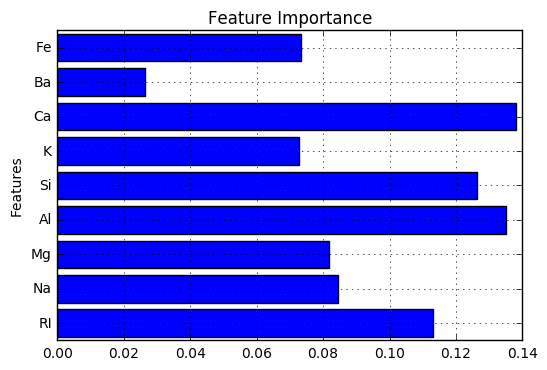

In [6]:

# display the relative importance of each attribute
relval = clf.feature_importances_

# horizontal bar plot of feature importance
pos = np.arange(9) + 0.5
plt.barh(pos, relval, align='center')
plt.title("Feature Importance")
plt.xlabel("")
plt.ylabel("Features")
plt.yticks(pos, ('RI','Na','Mg','Al','Si','K','Ca','Ba','Fe'))
plt.grid(True)

In [7]:
# calc metrics
correct = 0
incorrect = 0
for prediction, truth in zip(predictions, y_test):
    if prediction == truth:
        correct += 1
    elif prediction != truth:
        incorrect += 1
    else:
        print ("Evaluating performance for processed predictions:")
        break

In [8]:
print("Test Dataset (40%):")
print("correct:",correct)
print("incorrect:",incorrect)
print("accuracy score:", clf.score(X_test, y_test))


Test Dataset (40%):
correct: 64
incorrect: 22
accuracy score: 0.744186046512
